# Example of LMTSLR OTF processing

## FPS - November 12, 2019

There are four steps to processing an individual OTF map:

* process the OTF raw data and prepare a "SpecFile" with all reduced spectra
* view the "SpecFile" and identify good data for inclusion in the data cube.
* grid the spectra in the SpecFile into a data cube
* view and check the data cube

Processing programs are controlled with a set of command line arguments. This functionality is provided by `getopt` which is available in both python and c.

There is also a provision to prepare a text file ('configuration file') with the keyword/value pairs.  It should be noted that keywords and values can have no white space.  There are several kinds of possible values:

* strings
* boolean (entered as True or False)
* int
* float
* python lists (e.g. [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] to list all pixels for SEQUOIA
* lists of lists (e.g. [[-620,-320],[-220,80]] to provide a list of regions for baseline fits

The long form of the keywords are preceeded with a `--`, as in `--config`.  For some common keywords, there is a single letter shortcut provided.  Shortcuts only have a single `-`.  The `config` keyword shortcut is `-c`. 

In [7]:
# I find that it is sometimes necessary to explicitly import astropy for the notebook
import astropy



## Process the OTF Data --- process_oft_map

The first step in the reduction procedure is to process the OTF raw data from a single observation at the telescope.  All observations are written with a unique `ObsNum` and so this is used as the index to find the relevant data.

OTF maps produce a dump of raw spectra tagged with information about the position of the telescope and whether the particular spectral dump is to be used to create a reference spectrum. The processing program opens netCDF files to read all data.  Reference spectra are formed and subtracted from the spectra that will be used to make the map.  Users can specify whether to remove baselines from the spectra and whether to limit the number of spectral channels by taking a "slice" from the full spectrum.  This step is useful as a way to limit the size of the output file and improve the speed of this and future processing steps.

The final result of this step is a netCDF file with all the reduced spectra.  We call this a "SpecFile" and it is used as input to the next processing step involving gridding the data into a final data cube.

### Command Line Arguments

```
--config [-c]    : name of configuration file to set parameters
--output [-o]    : name of output SpecFile

DATA SPECIFICATION

--path [-p]      : set data path
--obsnum [-O]    : set obsnum
--obs_list       : enter list of obsnums
--bank           : spectral bank for processing
--pix_list       : enter list of pixels for processing

CALIBRATION

--use_cal        : use calibration scan for cal
--tsys           : value for tsys if use_cal==False

SPECTRAL LINE REDUCTION

--x_axis         : select spectral x axis [VLSR,VSKY,VBARY,VSRC,FLSR,FSKY,FBARY,FSRC]
--b_order        : set polynomial baseline order
--b_regions      : enter list of lists for baseline regions
--l_regions      : enter list of lists for line fit regions
--slice          : enter list to specify slice from spectrum for processing
```

### Example

This is the reduction of a single OTF map on a region in M31.  Observation number is 85778 and the path to the raw data is `/Volumes/FPS/data_lmt/`.


Here is the configuration file `M31_J-K_config.txt`:

```
path             /Volumes/FPS/data_lmt/
output           ./M31_Region_J-K_CO_1.nc
obsnum           85778                  # test
obs_list         [85778]                # test
bank             0
pix_list         [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
use_cal          False
tsys             220.0
x_axis           VLSR
b_order          0
b_regions        [[-620,-320],[-220,80]]
l_regions        [[-320,-220]]
slice            [-620,80]
```

I note that this step takes several minutes to run.

In [2]:
run process_otf_map -c M31_J-K_config.txt

program process_otf_map options
data path        =  /Volumes/FPS/data_lmt/
obsnum           =  85776
obsnum list      =  [85776]
bank             =  0
pixel list       =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
use cal          =  False
tsys             =  220.0
baseline order   =  0
baseline regions =  [[-620, -320], [-220, 80]]
line regions     =  [[-320, -220]]
slice            =  [-620, 80]
output file      =  ./M31_Region_J-K_CO_2.nc
 
found roach0_85776_0_1_Region_J-K_2019-10-31_070149.nc
append roach0_85776_0_1_Region_J-K_2019-10-31_070149.nc
found roach1_85776_0_1_Region_J-K_2019-10-31_070149.nc
append roach1_85776_0_1_Region_J-K_2019-10-31_070149.nc
found roach2_85776_0_1_Region_J-K_2019-10-31_070149.nc
append roach2_85776_0_1_Region_J-K_2019-10-31_070149.nc
found roach3_85776_0_1_Region_J-K_2019-10-31_070149.nc
append roach3_85776_0_1_Region_J-K_2019-10-31_070149.nc
found ifproc_2019-10-31_085776_00_0001.nc
before read npix
from pixels npix = 16
from xlen npix 

## Review the SpecFile --- view_spec_file

### Command Line Arguments

```
--config [-c]    : name of configuration file to set parameters
--input [-i]     : set input file name
--pix_list       : enter list of pixels to be displayed
--show_pixel [-p]: select specific pixel for display
--rms_cut        : set rms threshold for data
--plot_range     : list to set limits for data axis in plot
```

### Example

This example views the SpecFile we just created `/M31_Region_J-K_CO_1.nc`.  We will run first without specifying an rms cutoff to look at the data as is.  

By default the viewer will present plots of results for all 16 pixels in the array.  They are ordered: column 1: 0-3; column 2: 4-7; column 3: 8-11; column 4: 12-15.

5 plots are presented:

* waterfall plot of all spectra for each pixel
* plot of rms for each spectrum for each pixel
* histogram of rms values for each pixel
* mean of ALL spectra for each pixel
* x-y scatter plot to show region sampled

It is worth noting that there is some work to be done on the basic plots, particularly within the jupyter notebook.  However, the basic features are clear.  The waterfall plots and the plots of rms's of individual spectra show some bad spectra.  Pixel 3 has a lot of bad spectra. 

program view_spec_file options
input file       =  M31_Region_J-K_CO_2.nc
show all pixels  =  True
pixel list       =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
rms cutoff       =  10000.0
plot range       =  [-1.0, 1.0]


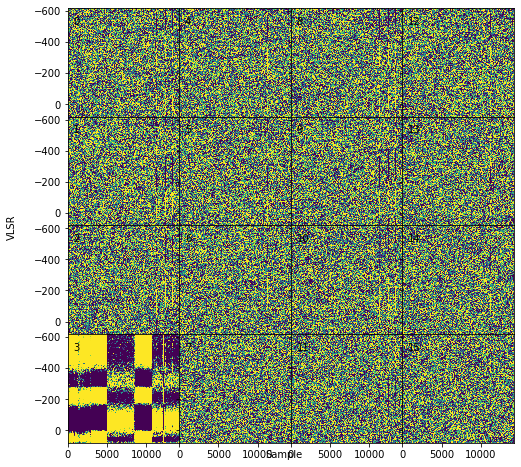

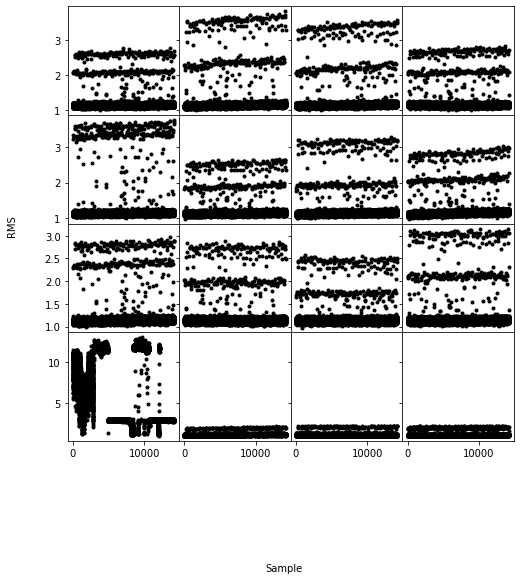

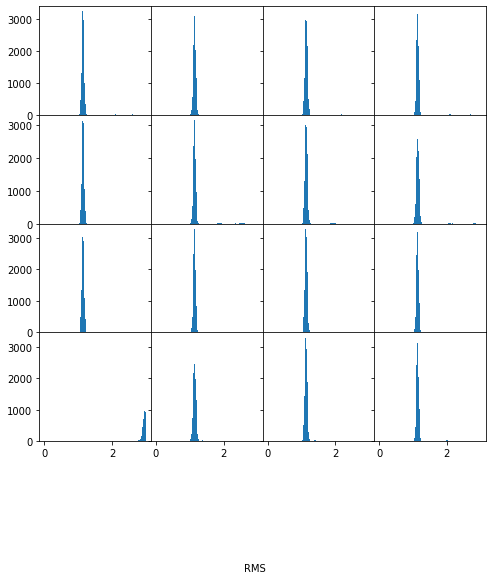

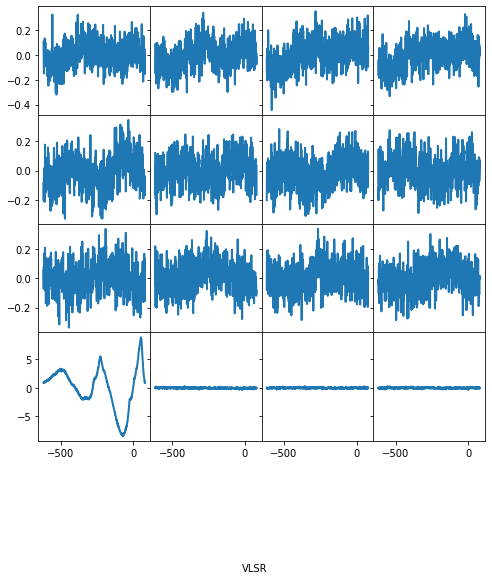

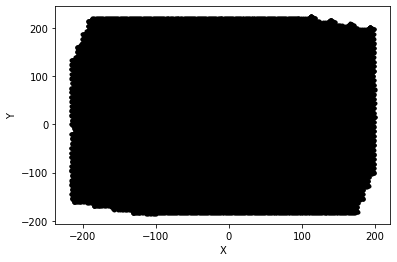

In [3]:
run view_spec_file -i M31_Region_J-K_CO_2.nc --plot_range [-1.,1.]

## Grid the Spectra in the SpecFile into a Data Cube --- grid_data

This step calls a "c" program to do the actual gridding step.  The command line arguments are mostly command line arguments used by the "c" program.  

### Command Line Arguments

```
--config [-c]      : configuration file
--program_path [-p]: full path name to grid program
--input [-i]       : input SpecFile name
--output [-o]      : output file name
--resolution       : resolution (arcsec)
--cell             : cell size (arcsec)
--pix_list         : list of pixels to process
--rms_cut          : rms threshold (K)
--x_extent         : x extent of cube (arcsec) note: cube will go to +/- x_extent
--y_extent         : y extent of cube (arcsec) note: cube will go to +/- y_extent
--otf_select       : filter code (0=box,1=jinc,2=gaussian)
--rmax             : maximum radius of convolution (units lambda/D)
--n_samples        : number of samples in convolution filter
--otf_a            : otf a parameter
--otf_b            : otf b parameter
--otf_c            : otf_c parameter
```

### Example

The SpecFile `M31_Region_J-K_CO_1.nc` is read and individual spectra are gridded into a data cube using the executable `spec_driver_fits`.  We adopt a resolution ($\frac{\lambda}{D}$) of 14 arcsec and create the grid on 7 arcsec bins which correspond to the Nyquist cell size (half the resolution).  Spectra with an rms greater than 1.3K are removed, based on the views seen in the previous result.

The feature to select pixels for processing has not been implemented in `spec_driver_fits`.  At the moment the program is hard coded to reject pixel 3.

The final cube is written as a FITS file: `M31_Region_J-K_CO_1.fits`

Here is the configuration file used: `M31_J-K_grid_config.txt`

```
program_path         ./spec_driver_fits
input                M31_Region_J-K_CO_1.nc
output               M31_Region_J-K_CO_1.fits
resolution           14
cell                 7
pix_list             [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
rms_cut              1.3
x_extent             250
y_extent             250
otf_select           1
rmax                 3.0
n_samples            256
otf_a                1.1
otf_b                4.75
otf_c                2.0
```

In [9]:
run grid_data -c M31_J-K_grid_config.txt

program grid_data options
program path     =  ./spec_driver_fits
input file name  =  M31_Region_J-K_CO_1.nc,M31_Region_J-K_CO_2.nc
output file name =  NEW_M31_Region_J-K_CO.fits
resolution       =  14
cell size        =  7
pix list         =  [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15]
rms cutoff       =  1.3
x extent         =  250
y extent         =  250
otf filter select=  jinc
r max            =  3.0
n conv samples   =  256
otf a            =  1.1
otf b            =  4.75
otf c            =  2.0
 
[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15]
./spec_driver_fits
STDOUT ****************************
1
i
file list=M31_Region_J-K_CO_1.nc,M31_Region_J-K_CO_2.nc
o
f
l
c
u
z
n
r
0
1
2
x
y
2
file M31_Region_J-K_CO_1.nc opened
file: M31_Region_J-K_CO_1.nc nspec= 229332 nchan= 689
allocated theData
axes initialized
0 1
1 1
2 1
3 0
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
file 0 M31_Region_J-K_CO_1.nc
file M31_Region_J-K_CO_1.nc opened
file: M31_Region_J-K_CO_1.nc nspec= 229332 nchan= 689
alloc

## View the Data Cube --- view_cube

The preparation of the data cube is the final step.  The `view-cube` process allows a quick look at the result to check for problems.

FITS files are written using FITS standards, which means velocities in m/s and angles in degrees.  The default units for entry of velocities in the command line arguments below are km/s and arcsec.  But, by changing the scale parameters `v_scale` and `scale` these can be adapted to other units.

### Command Line Arguments

```
--config [-c]    : name of configuration file to set parameters
--input [-i]     : input FITS file
--v_range        : [vlo,vhi] is velocity range for integrated intensity (km/s)
--v_scale        : scale factor for velocity [default=1/1000 to convert m/s to km/s]
--location       : [dx,dy] is location for spectrum plot (offset in arcsec)
--scale          : scale factor for position offset [default=1/3600 to convert arcsec to degrees]
--limits         : [xlo,xhi,ylo,yhi] limits for final map
--tmax_range     : [data_lo,data_hi] data range for tmax image
--tint_range     : [data_lo,data_hi] data range for tint image
--plot_type      : data to plot - valid options: TINT, TMAX
--interpolation  : valid options: none, nearest, bilinear, bicubic. default=bilinear
``` 

### Example

This example makes a set of plots for the data cube created above.  There are 5 figures created:

* SV slice through cube at constant declination.  The exact position is given by the `location` keyword which identifies a point in the map by offsets from the center position.

* SV slice through cube at constant right ascension. The exact position is given by the `location` keyword which identifies a point in the map by offsets from the center position.

* Image of the parameter indicated by `plot_type`.  In this example it is the integrated intensity `TINT`.  The `location` point is shown as a white +.

* Spectrum from the cube at the position given in `location`.

* Image of `TINT` presented using full WCS coordinates.

Here is the configuration file: `M31_view_cube_peak_1.txt`

```
input        M31_Region_J-K_CO_1.fits
v_range      [-300,-200]
location     [42,77] # this is a bright peak in NE quadrant
limits       [-240,240,-240,240]
tmax_range   [-.5,1.]
tint_range   [-1.,20.]
plot_type    TINT 
```

program view_cube options
input file name  =  NEW_M31_Region_J-K_CO.fits
velocity range   =  [-300, -200]
velocity scale   =  1000.0
location         =  [42, 77]
scale            =  0.0002777777777777778
limits           =  [-240, 240, -240, 240]
tmax plot range  =  [-0.5, 1.0]
tint plot range  =  [-1.0, 20.0]
plot type        =  TINT
interpolation    =  bilinear

-300 276 -200 374
42 30 77 47
[-240, 240, -240, 240]
[2, 70, 2, 70]
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                   73 / length of data axis 1                          
NAXIS2  =                   73 / length of data axis 2                          
NAXIS3  =                  689 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions           

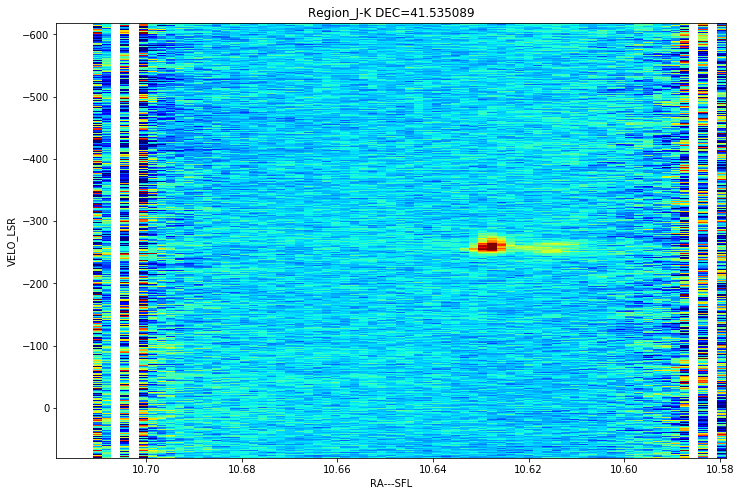

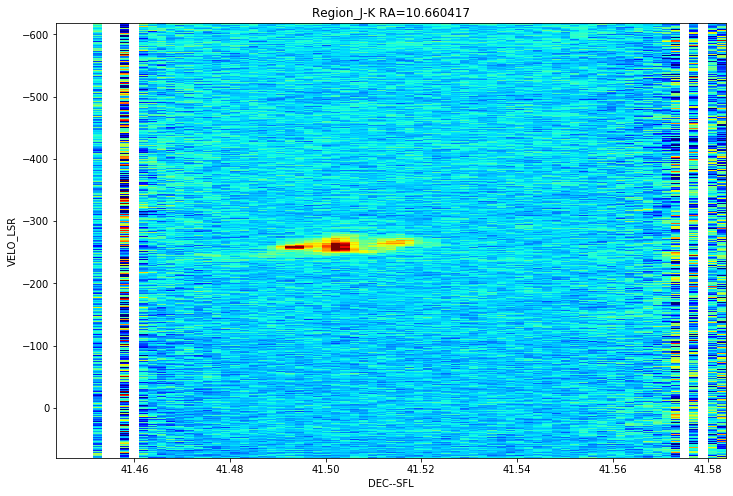

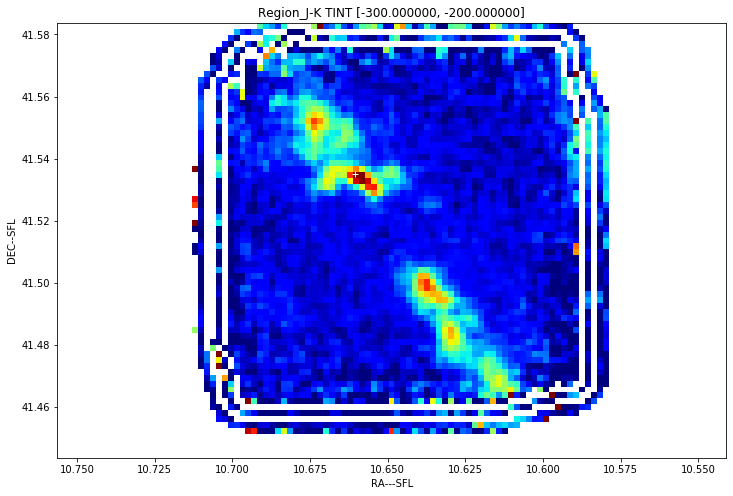

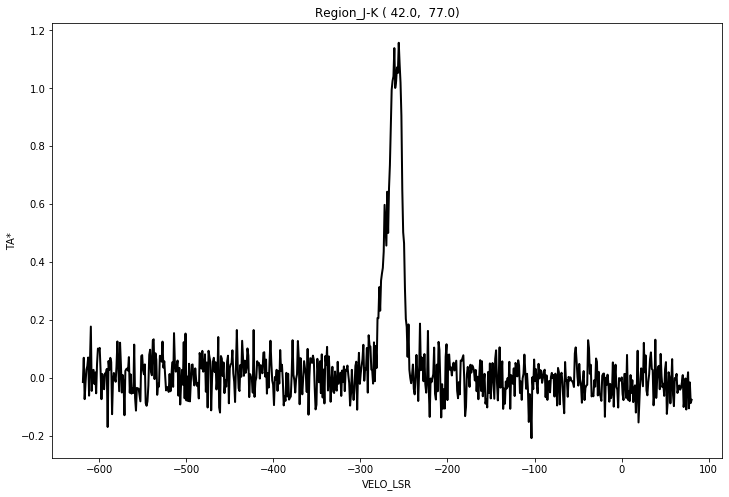

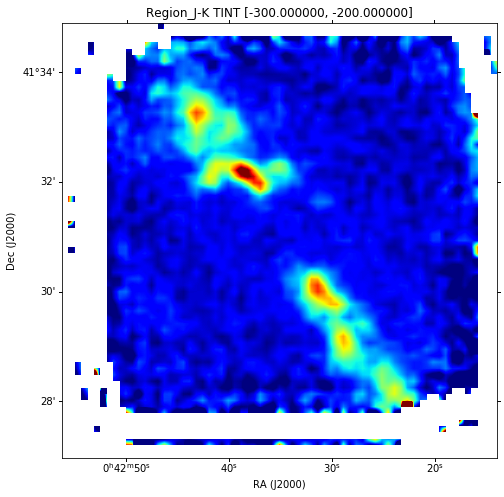

In [10]:
run view_cube -c M31_view_cube_peak_1.txt          